<a href="https://colab.research.google.com/github/ilikewilson/Wine-predictor/blob/main/Wine_Quality_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install metrics
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving WineQT.csv to WineQT (3).csv


In [ ]:
import pandas as pd

import io

DFname=pd.read_csv(io.BytesIO(uploaded['WineQT (3).csv']))

In [ ]:
df = pd.read_csv('WineQT (3).csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


# CORRELATION

In [ ]:
# The dataset comprises of numerical attributes that are appropriate for regression analysis.
# We aim to determine the correlation between each feature (fixed acidity, volatile acidity, citric acid, etc.) and our target variable - quality of wine.
# This correlation analysis will help us understand which features are positively or negatively related to the quality of wine, which can be useful for building a regression model.

correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
Id                      0.069708
Name: quality, dtype: float64


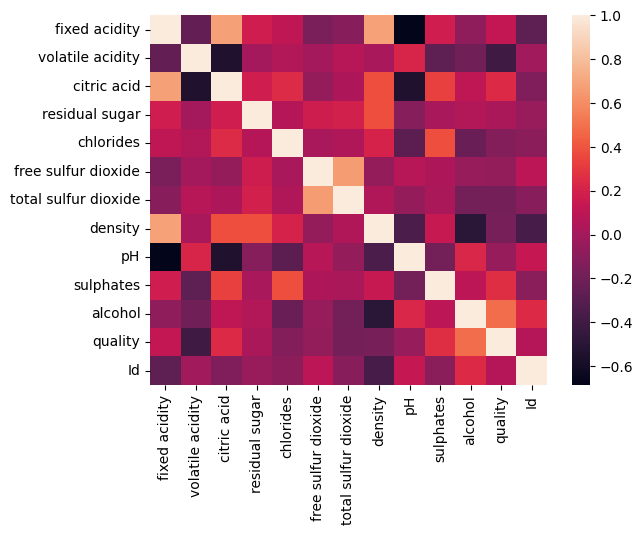

In [ ]:
#  We used the heatmap to visually represent our data in a matrix format where individual values are represented as colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

In [ ]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [ ]:
# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Id']


In [ ]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

# SCALING THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


# FEATURE ENGINEERING AND SELECTION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x_scaled)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

selector = RFE(estimator=LinearRegression(), n_features_to_select=5, step=1)
selector = selector.fit(x_poly, y)
selected_features = selector.support_
x_selected = x_poly[:, selected_features]




# Random Forest Regressor MODEL




In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming x_selected and y are your features and target variable respectively
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.70, random_state=3)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=3)

# Fit the model
model.fit(x_train, y_train)

# Predict on training and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train RMSE: 0.23557817391131936
Test RMSE: 0.6685636867538818


# MODEL TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=3),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print(f'Best Train RMSE: {train_rmse}')
print(f'Best Test RMSE: {test_rmse}')


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Train RMSE: 0.3182342257031917
Best Test RMSE: 0.6669733326263663


## LinearRegression **Model**

In [ ]:
# fitting linear regression to training data
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
# this gives the coefficients of the 10 features selected above.
regressor.coef_

array([-0.18795291, -0.06574012,  0.20281335,  0.30341049,  0.13781158])

In [ ]:
train_pred = regressor.predict(x_train)
train_pred

array([5.70197702, 5.26716872, 4.95743042, 5.81034961, 5.75282825,
       5.47873922, 5.80760441, 5.64511536, 5.96731843, 6.38678793,
       6.51912913, 5.15251665, 5.31180845, 5.87397606, 5.58138164,
       6.50701877, 5.15334049, 4.94239587, 5.57946639, 6.03162252,
       5.73398178, 5.60430191, 5.5718637 , 5.04788945, 5.698462  ,
       5.1279785 , 5.66470697, 6.01280226, 5.86001164, 6.40156735,
       5.3891245 , 5.37407893, 5.59940756, 6.52919745, 5.32500169,
       6.31361719, 5.67212669, 4.62718707, 5.52818577, 5.95796168,
       5.65472038, 6.09683913, 5.76892715, 4.80572651, 7.1716279 ,
       5.48734419, 5.04565658, 5.13229495, 5.92849722, 6.3910972 ,
       6.40644444, 5.17397961, 5.308744  , 6.92565515, 6.1687642 ,
       4.09051616, 5.18665014, 5.64064057, 6.24732577, 5.06896427,
       5.20669908, 5.53564136, 6.63775544, 5.26484065, 5.60816522,
       5.15051221, 5.43532323, 6.10928057, 5.93929971, 5.69117646,
       5.9767471 , 5.48971094, 5.4205507 , 5.58546982, 5.39968

In [ ]:
test_pred = regressor.predict(x_test)
test_pred

array([5.86930738, 6.05722131, 6.0297667 , 5.63612376, 6.55223852,
       5.79919167, 5.23911193, 6.21352163, 5.40361571, 6.23533014,
       6.65058297, 5.93199321, 5.43906073, 5.56057159, 5.30282571,
       5.99613584, 5.30350838, 5.11430486, 5.86111897, 6.60441206,
       5.41186275, 5.24515705, 5.01799048, 6.12294161, 5.19962514,
       5.29907858, 5.68491523, 5.92117525, 4.81145936, 5.44286719,
       5.68254548, 6.37574405, 5.1854874 , 5.66546505, 5.69299383,
       5.21160473, 5.22220109, 6.12774511, 5.24958761, 6.49635517,
       5.48869231, 5.27823035, 6.42344489, 5.46986586, 3.29499075,
       5.34950075, 5.68642071, 6.49352085, 5.67484784, 6.68345182,
       6.72880342, 5.71911089, 5.87289137, 6.37263413, 5.47015574,
       6.43953687, 5.55597724, 5.41853687, 6.44578762, 5.31217436,
       6.04734483, 6.86148448, 5.70487201, 5.75278329, 5.69540996,
       5.73773532, 5.1084548 , 5.65992405, 5.25774146, 5.39206513,
       5.46743638, 5.39677618, 5.41587546, 6.3425744 , 6.32625

In [ ]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.6083157506659498

In [ ]:
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.6557410501841242

In [ ]:
# The root-mean-square error (RMSE) is a measure of the differences between predicted values by a model and the actual values observed.
# The RMSE for the training and test sets are very similar so this indicates a good model.
# If the RMSE for the test set is much higher than that of the training set, it is possible that you have overfit the model which occurs when the model performs
# well on training data but poorly on test data.

In [ ]:
# rounding off the predicted values for test set
import numpy as np
predicted_data = np.round_(test_pred)
predicted_data

array([6., 6., 6., 6., 7., 6., 5., 6., 5., 6., 7., 6., 5., 6., 5., 6., 5.,
       5., 6., 7., 5., 5., 5., 6., 5., 5., 6., 6., 5., 5., 6., 6., 5., 6.,
       6., 5., 5., 6., 5., 6., 5., 5., 6., 5., 3., 5., 6., 6., 6., 7., 7.,
       6., 6., 6., 5., 6., 6., 5., 6., 5., 6., 7., 6., 6., 6., 6., 5., 6.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 5., 6., 6., 6., 5., 6., 5., 6.,
       5., 6., 6., 7., 5., 5., 6., 6., 6., 6., 6., 5., 6., 6., 6., 6., 6.,
       5., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6., 6., 5., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 5., 6., 5., 6., 5., 5., 6., 6., 5., 6., 7., 6.,
       6., 6., 5., 6., 5., 5., 6., 5., 7., 6., 6., 6., 5., 6., 5., 6., 6.,
       6., 7., 5., 5., 5., 6., 5., 6., 6., 5., 6., 5., 6., 6., 6., 6., 6.,
       6., 5., 6., 6., 6., 5., 6., 5., 5., 5., 5., 6., 5., 5., 6., 5., 5.,
       6., 6., 6., 5., 7., 5., 6., 7., 6., 6., 6., 5., 6., 5., 6., 5., 6.,
       5., 6., 6., 5., 6., 7., 5., 6., 6., 6., 6., 6., 6., 6., 5., 6., 5.,
       5., 6., 6., 6., 6.

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.5218657219223192
Mean Squared Error: 0.4299963248965781
Root Mean Squared Error: 0.6557410501841242
